In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_data = pd.read_csv('./data/链家北京租房数据.csv')
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [4]:
file_data.shape

(8223, 5)

In [7]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   区域       8223 non-null   object
 1   小区名称     8223 non-null   object
 2   户型       8223 non-null   object
 3   面积(㎡)    8223 non-null   object
 4   价格(元/月)  8223 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


# 数据基本处理

In [27]:
# 重复数据检测
file_data.duplicated()
   
# 删除重复值
file_data = file_data.drop_duplicates()
file_data.shape

(5773, 5)

In [28]:
# 空值检测
file_data = file_data.dropna()

## 数据类型转化

### 去掉面积中数字后面的汉字单位

In [30]:
# 创建一个空数组
array = np.array([])
data_areas = file_data['面积(㎡)'].values
for i in range(data_areas.shape[0]):
    array = np.append(array,data_areas[i][:-2])
    
array

array(['59.11', '56.92', '40.57', ..., '92.41', '71.81', '35.43'],
      dtype='<U32')

In [33]:
# 将array中的类型转换为浮点型
array = array.astype(np.float64)
array

array([59.11, 56.92, 40.57, ..., 92.41, 71.81, 35.43])

In [35]:
# 将原数据中面积那一列替换掉
file_data.loc[:,'面积(㎡)'] = array
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4房间2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


### 户型表达方式替换

In [46]:
# 把”房间“换成”室“
house_data = file_data["户型"]
new_list = np.array([])
for i in house_data:
    new_item = i.replace("房间","室")
    new_list = np.append(new_list,new_item)
    
file_data.loc[:,"户型"] = new_list
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4室2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


# 图表分析

## 房源数量位置分布分析

In [49]:
# 创建空的dataFrame
new_df = pd.DataFrame({"区域":file_data['区域'].unique(),'数量':0})

In [64]:
count = file_data.groupby(by = "区域").count()

new_df['数量'] = count.loc[:,"户型"].values
# 降序排列
new_df.sort_values(by = "数量",ascending = False)

,区域,数量
6,朝阳,1597
7,海淀,605
1,丰台,577
10,通州,477
9,西城,442
3,大兴,362
5,昌平,347
12,顺义,297
11,门头沟,285
0,东城,282


## 户型分析

In [65]:
house_data = file_data['户型']
house_data

0       1室0厅
1       3室0厅
2       1室1厅
3       2室1厅
4       1室1厅
        ... 
8218    3室1厅
8219    4室2卫
8220    3室1厅
8221    2室1厅
8222    1室1厅
Name: 户型, Length: 5773, dtype: object

In [109]:
house_scale = file_data.groupby(by = '户型')
house_scale_name = np.array([])
# house_scale.size().values
for key,values in house_scale:
   house_scale_name = np.append(house_scale_name,key)
# house_scale = pd.DataFrame({'户型':house_scale['户型'],'数量':house_scale['区域']})
house_scale_name

array(['0室0厅', '1室0卫', '1室0厅', '1室1卫', '1室1厅', '1室2厅', '2室0卫', '2室0厅',
       '2室1卫', '2室1厅', '2室2卫', '2室2厅', '2室3厅', '3室0卫', '3室0厅', '3室1卫',
       '3室1厅', '3室2卫', '3室2厅', '3室3卫', '3室3厅', '4室1卫', '4室1厅', '4室2卫',
       '4室2厅', '4室3卫', '4室3厅', '4室5厅', '5室0卫', '5室0厅', '5室1卫', '5室1厅',
       '5室2卫', '5室2厅', '5室3卫', '5室3厅', '5室4厅', '5室5厅', '6室0厅', '6室1卫',
       '6室1厅', '6室2厅', '6室3卫', '6室3厅', '6室4卫', '7室1厅', '7室2厅', '7室3厅',
       '7室4厅', '8室4厅', '9室1厅', '9室2厅', '9室5厅'], dtype='<U32')

In [144]:
new_house_scale = house_scale.count()
house_analysis = pd.DataFrame({'户型':house_scale_name,'数量':new_house_scale['区域'].values})

house_analysis

for i in range(house_analysis.shape[0]):
    if(house_analysis.iloc[i,1] < 50):
        house_analysis.iloc[i,1] = None

        
house_analysis = house_analysis.dropna()
house_analysis['数量'].astype(int)


2      244
3      126
4      844
8      120
9     2249
11     265
15      92
16     766
18     489
22      58
24     191
Name: 数量, dtype: int64

Text(0, 0.5, '户型')

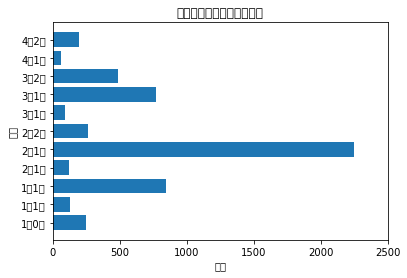

In [146]:
# 图形展示房屋类型
house_type = house_analysis["户型"]
house_type_num = house_analysis['数量']
plt.barh(range(11),house_type_num)
plt.yticks(range(11),house_type)
plt.xlim(0,2500)

plt.title('北京市各区域租房数量统计')
plt.xlabel('数量')
plt.ylabel('户型')

In [147]:
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4室2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


## 平均租金分析

In [150]:
# 求各区的总面积和总租金
all_area_price = pd.DataFrame({'区域':file_data['区域'].unique(),'面积':0,'总金额':0})
all_area_price['面积'] = file_data['面积(㎡)'].groupby(file_data['区域']).sum().values
all_area_price['总金额'] = file_data['价格(元/月)'].groupby(file_data['区域']).sum().values
all_area_price

,区域,面积,总金额
0,东城,27353.99,3945550
1,丰台,50922.79,4404893
2,亦庄开发区,15995.53,1318400
3,大兴,35884.15,2286950
4,房山,15275.41,726750
5,昌平,35972.92,2521515
6,朝阳,166921.72,20281396
7,海淀,57210.39,7279350
8,石景山,13956.67,1156500
9,西城,37141.64,5636975


In [151]:
all_area_price['每平米租金（元）'] = all_area_price['总金额'] / all_area_price['面积'] 

In [153]:
all_area_price

,区域,面积,总金额,每平米租金（元）
0,东城,27353.99,3945550,144.240383
1,丰台,50922.79,4404893,86.501407
2,亦庄开发区,15995.53,1318400,82.423027
3,大兴,35884.15,2286950,63.731480
4,房山,15275.41,726750,47.576464
5,昌平,35972.92,2521515,70.094810
6,朝阳,166921.72,20281396,121.502438
7,海淀,57210.39,7279350,127.238252
8,石景山,13956.67,1156500,82.863606
9,西城,37141.64,5636975,151.769685
